<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


## Paso 1. Abre el archivo de datos y estudia la información general 

In [2]:
df_games= pd.read_csv('/datasets/games.csv', sep =",")

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Paso 2. Prepara los datos

Primero se reemplazan los nombres de las columnas a minusculas.

In [4]:
df_games.columns = df_games.columns.str.lower()

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A continuación se convierte los datos en los tipos necesarios.

In [6]:
df_games['platform']=df_games['platform'].astype('category')

In [7]:
df_games['year_of_release']=df_games['year_of_release'].astype('Int64')

In [8]:
df_games['genre']=df_games['genre'].astype('category')

In [9]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

df_games['user_score'] = df_games['user_score'].astype(float)

In [10]:
df_games['rating']=df_games['rating'].astype('category')

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(3), float64(6), object(1)
memory usage: 1.1+ MB


Preparación de los valores nulos

In [12]:
df_games['name'].isna().sum()
df_games['name'] = df_games['name'].fillna('unknown')

In [13]:
df_games['year_of_release'].isna().sum()

269

In [14]:
df_games['critic_score'].isna().sum()

8578

In [15]:
df_games['user_score'].isna().sum()

9125

In [16]:
df_games['total_sales'] = (
    df_games['na_sales'] +
    df_games['eu_sales'] +
    df_games['jp_sales'] +
    df_games['other_sales']
)

In [17]:
df_games[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


Conclusiones y comentarios
1. Se cambia el tipo de la variable PLATFORM de objeto a categoría, ya que existe un número limitado de plataformas. Al convertirla en categoría, se facilita la exploración y el análisis de los datos.
2. La variable YEAR_OF_RELEASE se convierte de tipo float a entero, ya que representa un año específico y no valores decimales.
3. Se cambia el tipo de la variable GENRE de objeto a categoría, dado que hay un conjunto definido de géneros de videojuegos. Tratarla como categoría facilita los análisis posteriores.
4. Algunas celdas contienen el valor 'tbd', lo cual impide convertir la variable USER_SCORE a float. Para solucionar esto, se reemplazan los valores 'tbd' por NaN. Esto permite tratar la variable como numérica, lo que es fundamental para los análisis estadísticos.
5. Se cambia otra variable de tipo object a category por la misma razón: tiene un número limitado de categorías, lo que mejora la eficiencia y claridad en los análisis (nota: sería ideal especificar el nombre de esta variable).
6. Se identifican dos valores nulos en la variable NAME. En lugar de eliminar las filas completas, se reemplazan los valores nulos con 'UNKNOWN'.
7. La variable YEAR_OF_RELEASE presenta 269 valores nulos. Se decide dejarlos como NaN, ya que al ser de tipo float, Pandas puede trabajar con ellos sin problemas. Reemplazar o imputar estos valores podría introducir sesgos o distorsionar los datos.
8. La variable CRITIC_SCORE también contenía valores 'tbd'. Se reemplazan por NaN para poder trabajar con la variable como numérica. Los valores nulos se conservan tal cual para evitar alterar la integridad de los datos.
9. Los valores ausentes en USER_SCORE se dejan sin modificar. Sustituirlos por cero no es adecuado, ya que implicaría asignar una calificación que no fue otorgada, lo que podría afectar negativamente los análisis.
10. Se calcula la venta total de cada juego como la suma de las ventas en todas las regiones. Este valor se guarda en una nueva columna para facilitar futuros análisis.

## Paso 3. Paso 3. Analiza los datos

In [18]:
df_games['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

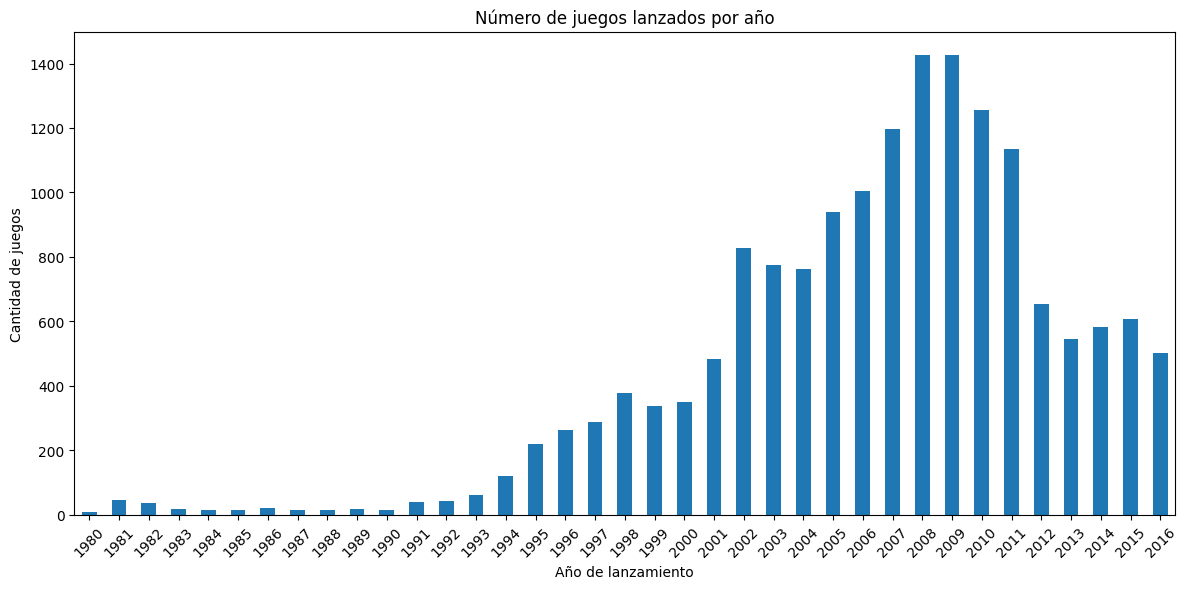

In [19]:

df_games['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El año 2008 y 2009 fueron los años con mayor cantidad de juegos lanzados con aproximadamente 1400. Sin embargo desde el año 1993 se empieza a presentar un aumento exponencial en la cantidad de juegos lanzados hasta el 2009 luego de este año empieza a ver un decrecimiento en la cantidad de juegos lanzados.

In [20]:
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

<AxesSubplot:title={'center':'Ventas totales por plataforma'}, xlabel='platform'>

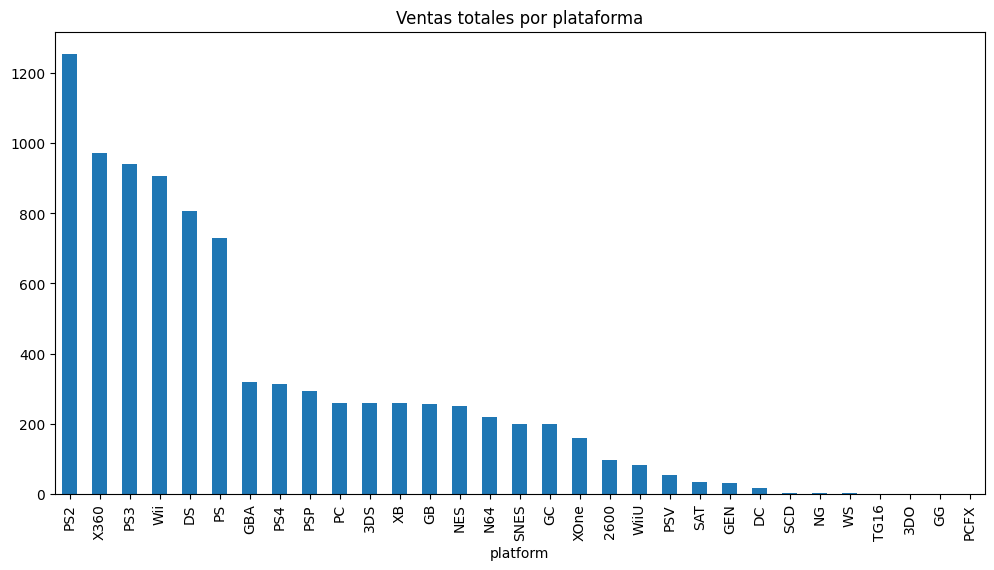

In [21]:
platform_sales.plot(kind='bar', figsize=(12, 6), title='Ventas totales por plataforma')

Las plataformas totales que mas vendieron durante los años de estudios fueron el PS2 en primer lugar X360 en segundo, PS3 de tercer lugar, Wii en cuarto lugar y DS en quinto lugar y PS en sexto lugar de ahi en adelante las plataformas muestras una dismunion de las ventas totales de manera significativa.

In [22]:
top_platforms = platform_sales.head(6).reset_index()
filtro = df_games['platform'].isin(top_platforms['platform'])
top_df = df_games[filtro]

In [23]:
platform_year_sales = top_df.groupby(['year_of_release', 'platform'], observed=True)['total_sales'].sum().unstack().fillna(0)

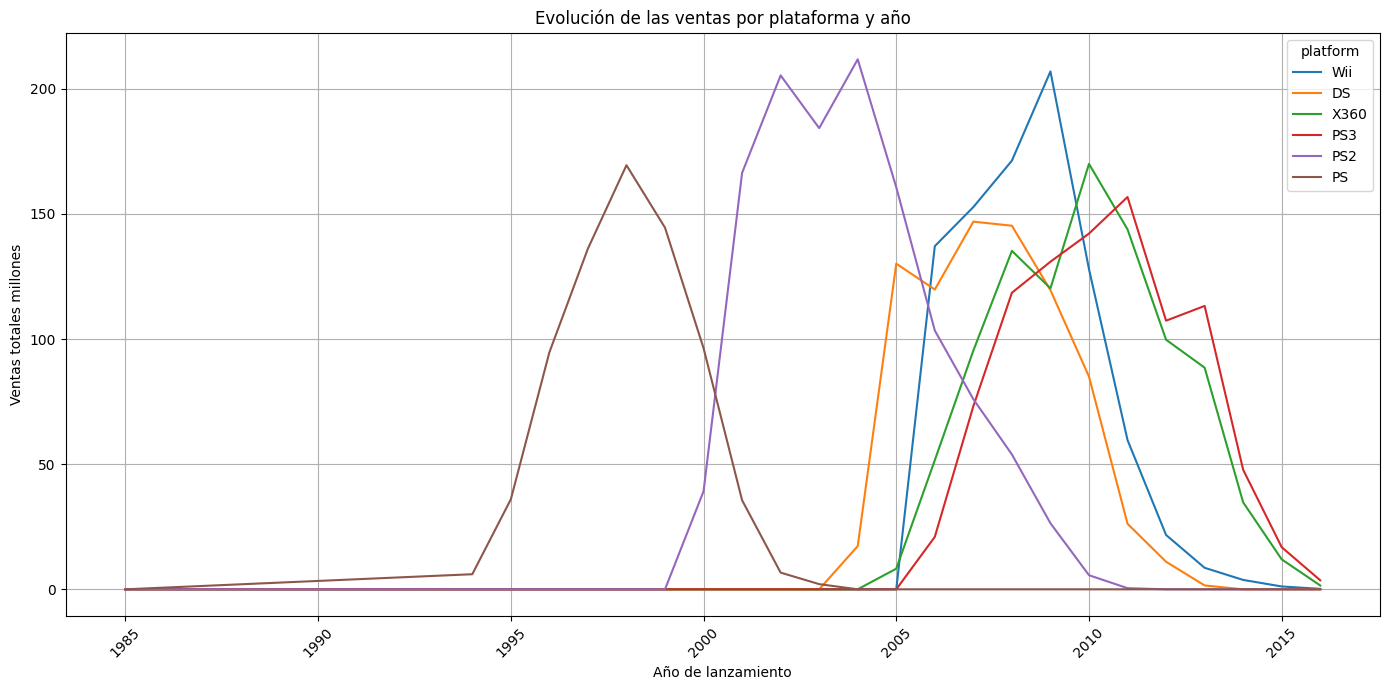

In [55]:
platform_year_sales.plot(kind='line', figsize=(14, 7))
plt.title('Evolución de las ventas por plataforma y año')
plt.ylabel('Ventas totales millones')
plt.xlabel('Año de lanzamiento')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

A continuación se seleccionan unicamente los años desde el 2002 en adelante con el fin de poner construir un modelo para el año 2017.Para esta eleccion se tuvo en cuenta el 2002 como punto de inicio por el significativo aumento de la cantidad de juegos lanzados desde ese año en adelante.

In [25]:
df_filtrado= df_games[df_games['year_of_release'] >= 2002]

Analisis de las plataformas lideres en ventas

In [26]:
plataformas_lideres=df_filtrado.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

<AxesSubplot:title={'center':'Ventas totales por plataforma'}, xlabel='platform'>

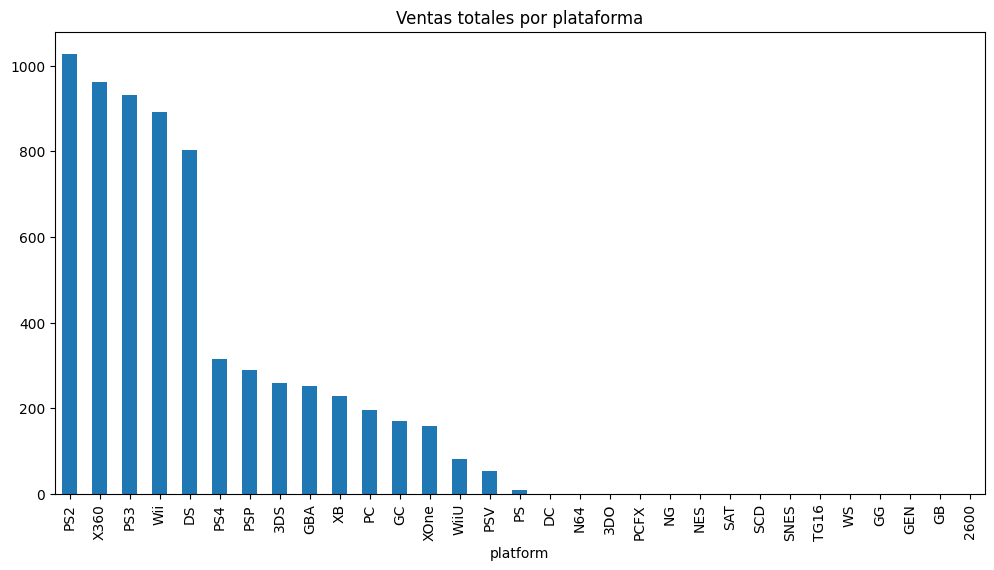

In [27]:
plataformas_lideres.plot(kind='bar', figsize=(12, 6), title='Ventas totales por plataforma')

Para este nuevo periodo de tiempo las plataformas lideres son el ps2 y el x360. Se presenta un aumento de del ps4 mientras que plataformas que eran lideres com el gba y ps disminuyen, ps de manera significativa. La innovacion tecnologica dentro del periodo de estudio señala el PS4 como la consola que se proyecta con mayor crecimiento, sin embargo, PS2 y X360 son lideres en ventas.

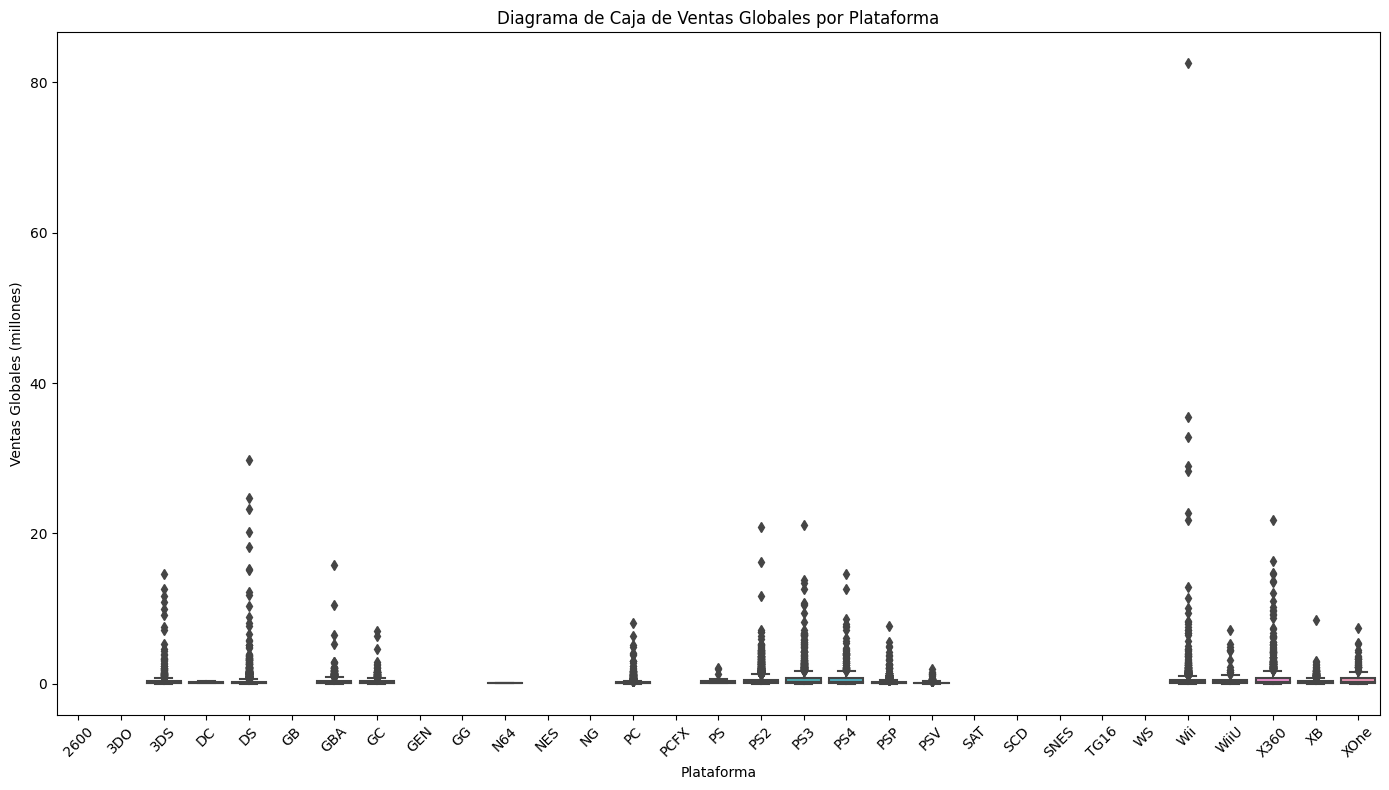

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=df_filtrado)
plt.xticks(rotation=45)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Plataforma')
plt.tight_layout()
plt.show()

las plataformas DS, PS2, Wii y X360 tienen varios outliers con ventas muy altas, lo que indica juegos que fueron significativamente exitosos en sus plataformas.
La mayoría de las plataformas tienen la mediana de ventas bastante baja, cerca de cero o valores pequeños, indicando que la mayoría de los juegos no venden grandes cantidades globales
Las plataformas DS, Wii, PS2 y X360 parecen tener mayores ventas máximas y más juegos con ventas altas, lo que puede sugerir una mayor popularidad 
Plataformas como 3DO, GG, NES y otras tienen ventas muy bajas y pocas o ninguna venta alta destacada.

A continuación se realiza una comparación entre las reseñas de usuarios y profesionales y las ventas de la plataforma Wii.

In [29]:
wii_df = df_filtrado[(df_filtrado['platform'] == 'Wii') & 
            (df_filtrado['critic_score'].notna()) & 
            (df_filtrado['user_score'].notna())]



In [30]:
wii_df = wii_df[wii_df['user_score'] != 'tbd']
wii_df['user_score'] = pd.to_numeric(wii_df['user_score'], errors='coerce')

Text(0, 0.5, 'Ventas Globales (millones)')

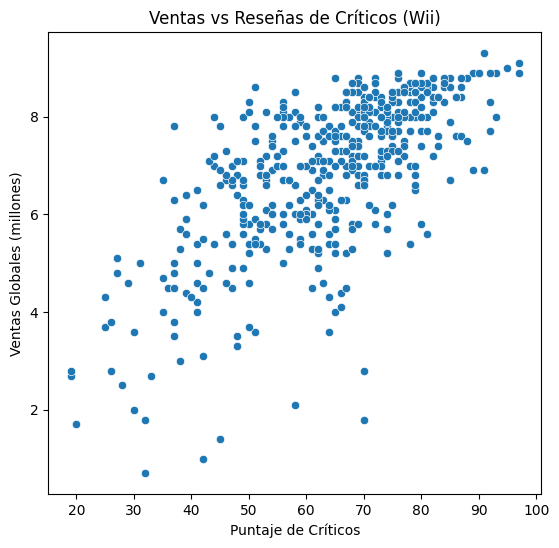

In [31]:
plt.figure(figsize=(14, 6))

# Reseñas de críticos vs ventas
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='user_score', data=wii_df)
plt.title('Ventas vs Reseñas de Críticos (Wii)')
plt.xlabel('Puntaje de Críticos')
plt.ylabel('Ventas Globales (millones)')

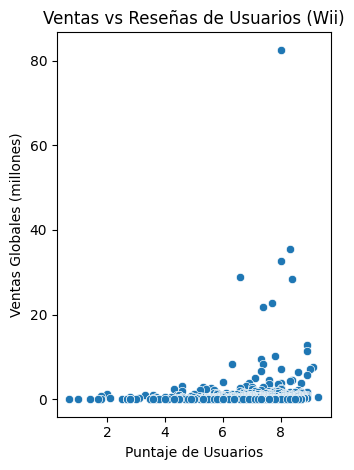

In [32]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=wii_df)
plt.title('Ventas vs Reseñas de Usuarios (Wii)')
plt.xlabel('Puntaje de Usuarios')
plt.ylabel('Ventas Globales (millones)')

plt.tight_layout()
plt.show()

In [33]:
critic_corr = wii_df['critic_score'].corr(wii_df['total_sales'])
user_corr = wii_df['user_score'].corr(wii_df['total_sales'])

print(f"Correlación entre reseñas de críticos y ventas: {critic_corr:.2f}")
print(f"Correlación entre reseñas de usuarios y ventas: {user_corr:.2f}")

Correlación entre reseñas de críticos y ventas: 0.17
Correlación entre reseñas de usuarios y ventas: 0.11


Las ventas de los juegos en la plataforma Wii no están fuertemente influenciadas ni por las reseñas de críticos ni por las de usuarios.
Los factores comerciales o de mercado, como campañas de marketing, popularidad de franquicias o disponibilidad, podrían tener un mayor impacto en las ventas.
Aunque las reseñas pueden influir, su efecto parece ser limitado en este caso particular.

Analisis del comportamiento del mismo juego en otras plataformas

In [34]:
wii_games = df_filtrado[df_filtrado['platform'] == 'Wii']

In [35]:
wii_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32


In [36]:
juegos_comunes = wii_games['name'].unique()
multi_plataformas = df_filtrado[df_filtrado['name'].isin(juegos_comunes)]


In [37]:
sales_comparison = multi_plataformas.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

pivot_table = sales_comparison.pivot(index='name', columns='platform', values='total_sales').fillna(0)

print(pivot_table.head())

platform                          2600  3DO  3DS   DC    DS   GB  GBA   GC  \
name                                                                         
007: Quantum of Solace             0.0  0.0  0.0  0.0  0.13  0.0  0.0  0.0   
10 Minute Solution                 0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0   
101-in-1 Party Megamix Wii         0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0   
101-in-1 Sports Party Megamix      0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0   
2010 FIFA World Cup South Africa   0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0   

platform                          GEN   GG  ...  SAT  SCD  SNES  TG16   WS  \
name                                        ...                              
007: Quantum of Solace            0.0  0.0  ...  0.0  0.0   0.0   0.0  0.0   
10 Minute Solution                0.0  0.0  ...  0.0  0.0   0.0   0.0  0.0   
101-in-1 Party Megamix Wii        0.0  0.0  ...  0.0  0.0   0.0   0.0  0.0   
101-in-1 Sports Party Megamix     0.0  0.0  ...  0.0  0.0   0.0

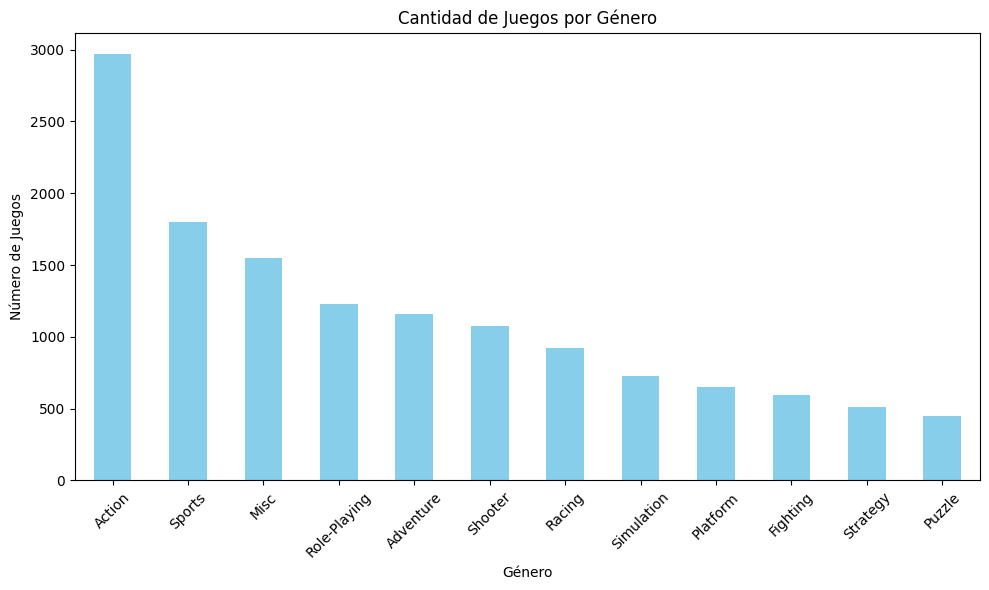

In [38]:
conteo_generos = df_filtrado['genre'].value_counts()

# Graficar distribución
plt.figure(figsize=(10, 6))
conteo_generos.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Juegos por Género')
plt.ylabel('Número de Juegos')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comentarios y conclusiones sobre el analisís de datos.
1. Los años 2008 y 2009 fueron los de mayor cantidad de lanzamientos de videojuegos, con aproximadamente 1,400 títulos cada uno. Desde 1993 se observa un aumento sostenido —e incluso exponencial— en la cantidad de juegos lanzados anualmente, alcanzando su punto máximo en 2009. A partir de ese año, comienza una disminución progresiva en el número de lanzamientos.
2. Las plataformas con mayores ventas totales a lo largo del período analizado fueron, en orden:
PS2 (primer lugar)
Xbox 360 (segundo lugar)
PS3 (tercer lugar)
Wii (cuarto lugar)
Nintendo DS (quinto lugar)
PS1 (sexto lugar)
A partir de estas plataformas, las demás muestran una disminución significativa en las ventas totales.
3. Se seleccionan únicamente los datos desde el año 2002 en adelante, con el objetivo de construir un modelo predictivo para el año 2017. La elección de 2002 como punto de inicio se basa en el notable incremento en la cantidad de juegos lanzados a partir de ese año, lo que proporciona un volumen de datos más representativo y útil para el análisis.
4. Durante este nuevo período (2002 en adelante), las plataformas líderes en ventas son el PS2 y el Xbox 360. Se observa un crecimiento importante en la participación del PS4, mientras que plataformas que anteriormente eran dominantes, como el GBA y el PS1, muestran una disminución, siendo especialmente notable en el caso del PS1. La evolución tecnológica durante este período posiciona al PS4 como la consola con mayor proyección de crecimiento, aunque las ventas acumuladas siguen siendo lideradas por el PS2 y el X360.
5. Las plataformas DS, PS2, Wii y X360 presentan varios valores atípicos (outliers) con ventas extremadamente altas, lo que indica la existencia de juegos excepcionalmente exitosos en dichas consolas.
La mediana de ventas en la mayoría de las plataformas es baja, cercana a cero o a valores reducidos, lo que sugiere que la mayoría de los juegos no alcanzan cifras significativas de ventas globales.
Las plataformas DS, Wii, PS2 y X360 concentran la mayor cantidad de juegos con altas ventas, lo cual puede asociarse a una mayor popularidad y presencia en el mercado.
En contraste, plataformas como 3DO, GG, NES y otras muestran ventas muy bajas y carecen de títulos con ventas destacadas.
6. En el caso de la plataforma Wii, las ventas de los juegos no parecen estar fuertemente influenciadas ni por las reseñas de críticos ni por las de usuarios. Esto sugiere que otros factores, como las estrategias comerciales, el marketing, la fuerza de las franquicias o la disponibilidad del producto, podrían tener un mayor peso en el rendimiento comercial. Aunque las reseñas pueden tener cierto efecto, este parece ser limitado en este caso particular.
7. Los géneros con mayor número de títulos lanzados son Acción y Deportes, siendo el género de Acción el más predominante, con una diferencia notable respecto al segundo.



## Paso 4. Crea un perfil de usuario para cada región

In [39]:
ventas_por_plataforma = df_filtrado.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

top_na = ventas_por_plataforma['na_sales'].sort_values(ascending=False).head(5)
top_eu = ventas_por_plataforma['eu_sales'].sort_values(ascending=False).head(5)
top_jp = ventas_por_plataforma['jp_sales'].sort_values(ascending=False).head(5)

print("Top 5 plataformas en Norteamérica:\n", top_na, "\n")
print("Top 5 plataformas en Europa:\n", top_eu, "\n")
print("Top 5 plataformas en Japón:\n", top_jp)

Top 5 plataformas en Norteamérica:
 platform
X360    595.74
Wii     486.87
PS2     477.35
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64 

Top 5 plataformas en Europa:
 platform
PS3     327.21
PS2     269.62
X360    268.32
Wii     258.32
DS      188.41
Name: eu_sales, dtype: float64 

Top 5 plataformas en Japón:
 platform
DS     175.00
PS2    110.88
3DS    100.62
PS3     79.41
PSP     75.88
Name: jp_sales, dtype: float64


In [40]:
total_na = ventas_por_plataforma['na_sales'].sum()
total_eu = ventas_por_plataforma['eu_sales'].sum()
total_jp = ventas_por_plataforma['jp_sales'].sum()

cuota_na = (top_na / total_na * 100).round(2)
cuota_eu = (top_eu / total_eu * 100).round(2)
cuota_jp = (top_jp / total_jp * 100).round(2)

print("Cuota de mercado en NA (%):\n", cuota_na, "\n")
print("Cuota de mercado en UE (%):\n", cuota_eu, "\n")
print("Cuota de mercado en JP (%):\n", cuota_jp)

Cuota de mercado en NA (%):
 platform
X360    18.27
Wii     14.93
PS2     14.64
PS3     11.96
DS      11.66
Name: na_sales, dtype: float64 

Cuota de mercado en UE (%):
 platform
PS3     16.88
PS2     13.91
X360    13.85
Wii     13.33
DS       9.72
Name: eu_sales, dtype: float64 

Cuota de mercado en JP (%):
 platform
DS     23.87
PS2    15.12
3DS    13.72
PS3    10.83
PSP    10.35
Name: jp_sales, dtype: float64


1. Las cinco plataformas principales varían significativamente entre regiones
Las plataformas más exitosas no son las mismas en todas las regiones. Aunque algunas como PS2 y PS3 están presentes en todos los mercados, otras muestran diferencias marcadas en su popularidad regional.
 2. Xbox 360 domina en Norteamérica, pero tiene menor presencia en Japón
Xbox 360 es la plataforma líder en Norteamérica, con 595.74 millones de unidades vendidas, muy por encima de otras plataformas.
Sin embargo, no aparece entre las 5 principales en Japón, lo que indica una baja aceptación en ese mercado, probablemente por la preferencia local por consolas japonesas como las de Sony y Nintendo.
3. PlayStation 3 y PlayStation 2 son plataformas fuertes y consistentes en todas las regiones
La PS3 y la PS2 figuran entre las 3 primeras plataformas en Norteamérica y Europa, y también tienen buena representación en Japón.
Esta consistencia sugiere una gran penetración global de la marca PlayStation, con buena aceptación tanto en occidente como en Asia.
4. El Nintendo DS es la plataforma líder en Japón y mantiene una posición sólida en otras regiones
El Nintendo DS encabeza las ventas en Japón con 175 millones, y se mantiene dentro del top 5 en Norteamérica y Europa, aunque con cifras más bajas.
Esto refleja la fuerte presencia local de Nintendo en Japón, así como su competitividad global.



In [41]:
ventas_por_genero = df_filtrado.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

top5_na_gen = ventas_por_genero['na_sales'].sort_values(ascending=False).head(5)
top5_eu_gen = ventas_por_genero['eu_sales'].sort_values(ascending=False).head(5)
top5_jp_gen = ventas_por_genero['jp_sales'].sort_values(ascending=False).head(5)

print(" Top 5 géneros en Norteamérica:\n", top5_na_gen, "\n")
print(" Top 5 géneros en Europa:\n", top5_eu_gen, "\n")
print(" Top 5 géneros en Japón:\n", top5_jp_gen)

 Top 5 géneros en Norteamérica:
 genre
Action          704.67
Sports          537.84
Shooter         476.12
Misc            348.17
Role-Playing    267.64
Name: na_sales, dtype: float64 

 Top 5 géneros en Europa:
 genre
Action     436.49
Sports     315.67
Shooter    284.35
Misc       187.55
Racing     167.63
Name: eu_sales, dtype: float64 

 Top 5 géneros en Japón:
 genre
Role-Playing    216.36
Action          122.50
Misc             81.40
Sports           65.62
Platform         49.17
Name: jp_sales, dtype: float64


In [42]:
ventas_por_rating= df_filtrado.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values('na_sales', ascending=False)

print(ventas_por_rating)

        na_sales  eu_sales  jp_sales
rating                              
E        1139.37    630.17    175.38
M         698.99    456.15     53.44
T         650.02    358.49    114.29
E10+      345.50    183.33     40.20
EC          1.53      0.11      0.00
AO          1.26      0.61      0.00
K-A         0.00      0.00      0.00
RP          0.00      0.03      0.00


1. Sí, la clasificación ESRB afecta las ventas por región.
2. Las regiones con más ventas (NA y EU) responden bien a juegos tanto familiares como maduros.
3. Japón es más conservador, con ventas bajas en juegos "Mature", y un fuerte enfoque en juegos familiares o juveniles.

Conclusiones y comentarios: 
Las plataformas de videojuegos muestran una notable variación en popularidad según la región. Mientras que consolas como la PS2 y PS3 mantienen una presencia sólida y constante a nivel global, otras como la Xbox 360 dominan ampliamente en Norteamérica pero tienen escasa presencia en Japón, donde la preferencia se inclina hacia marcas locales como Nintendo y Sony. El Nintendo DS destaca especialmente en Japón, donde lidera las ventas, aunque también mantiene posiciones relevantes en Europa y Norteamérica. Estas diferencias regionales también se reflejan en la recepción del contenido: en América del Norte y Europa, los juegos con clasificación “Mature” tienen buena acogida, indicando un mercado abierto a una amplia variedad de géneros; en contraste, el mercado japonés se orienta mayoritariamente hacia juegos de contenido familiar o juvenil, mostrando una actitud más conservadora frente a títulos para adultos. En conjunto, estos resultados evidencian cómo factores culturales, marcas locales y preferencias por tipo de contenido influyen significativamente en las ventas y en el posicionamiento de las consolas a nivel mundial.

## Paso 5. Prueba las siguientes hipótesis:

A continuación se pone a prueba la siguiente hipótesis : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [50]:
xbox_scores = df_filtrado[(df_filtrado['platform'] == 'XOne')]['user_score'].dropna()
pc_scores = df_filtrado[(df_filtrado['platform'] == 'PC')]['user_score'].dropna()
xbox_scores = pd.to_numeric(xbox_scores, errors='coerce').dropna()
pc_scores = pd.to_numeric(pc_scores, errors='coerce').dropna()
# Nivel de significancia
alpha = 0.05

test_results = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)
print("Valor p de la prueba t para comparar USER_SCORE entre Xbox One y PC:", test_results.pvalue)

Valor p de la prueba t para comparar USER_SCORE entre Xbox One y PC: 4.8222010278629056e-05


Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
Dado que el valor p es mucho menor que el nivel de significancia, se rechaza la hipótesis nula.
Esto indica que existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC.

In [52]:
cal_accion = df_filtrado[(df_filtrado['genre'] == 'Action')]['user_score'].dropna()
cal_deportes = df_filtrado[(df_filtrado['genre'] == 'Sports')]['user_score'].dropna()
cal_accion = pd.to_numeric(cal_accion, errors='coerce').dropna()
cal_deportes = pd.to_numeric(cal_deportes, errors='coerce').dropna()


test_results_2 = st.ttest_ind(cal_accion, cal_deportes, equal_var=False)
print("Valor p de la prueba t para comparar USER_SCORE entre Acción y Deportes:", test_results_2.pvalue)

Valor p de la prueba t para comparar USER_SCORE entre Acción y Deportes: 0.027353098776462997


Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 
El resultado arrojó un valor p de aproximadamente 0.027, que es menor al nivel de significancia de 0.05. Por tanto, se rechaza la hipótesis nula y se concluye que hay una diferencia estadísticamente significativa en las calificaciones de los usuarios entre los géneros de Acción y Deportes.

## Paso 6. Escribe una conclusión general

A lo largo del análisis del mercado de los videojuegos entre 2002 y 2016, se evidencian importantes tendencias en el comportamiento de la industria. Los años 2008 y 2009 marcaron el punto más alto en lanzamientos, seguido de una caída progresiva, lo que puede reflejar un proceso de saturación o cambios estructurales en el mercado. Las plataformas más exitosas en ventas globales fueron el PS2, Xbox 360, y PS3, destacándose también la presencia del Wii y Nintendo DS. Sin embargo, con la evolución tecnológica, consolas como el PS4 comenzaron a ganar protagonismo, aunque aún no alcanzaban las cifras acumuladas de sus predecesoras. La mayoría de los juegos, no obstante, muestran ventas modestas, con solo unos pocos títulos alcanzando cifras extraordinarias, en especial en plataformas populares como DS, PS2, Wii y X360. Estas observaciones apoyan la decisión de limitar el análisis desde 2002, año en que se intensificó la producción y se consolidaron muchas de las plataformas más relevantes.

Por otro lado, los resultados de las pruebas estadísticas permiten profundizar en el comportamiento de los usuarios. Se encontró una diferencia significativa en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC, lo que sugiere que las experiencias de juego, expectativas o estándares de calidad pueden variar notablemente entre ambas. Asimismo, se identificó una diferencia significativa en las calificaciones entre los géneros de Acción y Deportes, lo cual evidencia que las preferencias de los usuarios no solo dependen de la plataforma, sino también del tipo de juego. Finalmente, el análisis regional muestra que la popularidad de las consolas varía considerablemente según la zona geográfica, influida por factores culturales y preferencias de contenido. Japón, por ejemplo, prioriza juegos familiares y marcas locales, mientras que en Norteamérica y Europa se observa una mayor apertura hacia títulos de contenido más maduro. Todo esto refuerza la idea de que el éxito comercial de los videojuegos depende de una combinación compleja de factores tecnológicos, culturales, comerciales y de percepción del usuario.